In [38]:
# 훈련세트, 검증세트, 테스트 세트
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split

In [39]:
# 이미지 데이터 하나로 불러오기
files = [(path, path.replace("data_original\\","").replace(".npy", "")) for path in glob("data_original/*")]

# 분류 정보 처리
categories = [category for _, category in files]

np.save('category.npy', np.array(categories))

In [40]:
ea = 65000
items = np.zeros((len(files) * ea, 28, 28), dtype=np.uint8)
targets = np.zeros(len(files) * ea, dtype=np.uint8)
for i, item in enumerate (files):
    path, category = item
    
    target = categories.index(category)
    print(path, category, target)

    data = np.load(path)
    for j in range(ea):
        rows = i * ea + j
        items[rows] = data[j].reshape(-1, 28, 28)
        targets[rows] = target

print(items.shape, targets.shape)

data_original\aircraft carrier.npy aircraft carrier 0
data_original\airplane.npy airplane 1
data_original\alarm clock.npy alarm clock 2
data_original\ambulance.npy ambulance 3
data_original\angel.npy angel 4
data_original\animal migration.npy animal migration 5
data_original\ant.npy ant 6
data_original\anvil.npy anvil 7
data_original\apple.npy apple 8
data_original\arm.npy arm 9
data_original\asparagus.npy asparagus 10
data_original\axe.npy axe 11
data_original\backpack.npy backpack 12
data_original\banana.npy banana 13
data_original\barn.npy barn 14
data_original\baseball bat.npy baseball bat 15
data_original\baseball.npy baseball 16
data_original\basket.npy basket 17
data_original\basketball.npy basketball 18
data_original\bat.npy bat 19
data_original\bathtub.npy bathtub 20
data_original\beach.npy beach 21
data_original\bear.npy bear 22
data_original\beard.npy beard 23
data_original\bed.npy bed 24
data_original\bee.npy bee 25
data_original\belt.npy belt 26
data_original\bench.npy ben

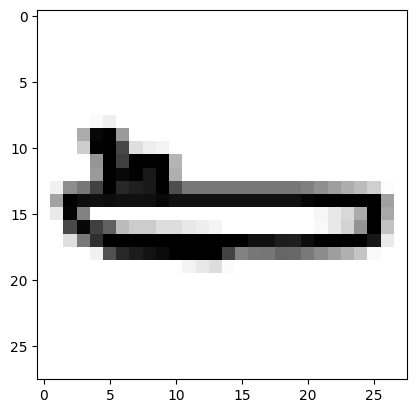

In [41]:
import matplotlib.pyplot as plt
plt.imshow(items[0], cmap='gray_r')
plt.show()

In [42]:
indexes = np.arange(items.shape[0])
np.random.shuffle(indexes)

items = items[indexes, :, :]
targets = targets[indexes]

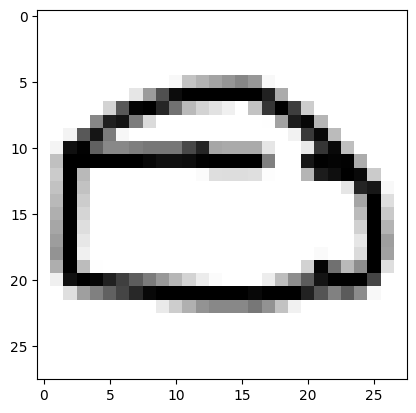

In [43]:
plt.imshow(items[0], cmap='gray_r')
plt.show()

In [44]:
rows = int(np.ceil(items.shape[0] / ea))
for i in range(49):
    start = i * ea
    data = items[start:start + ea,:,:]
    target = targets[start:start + ea]
    np.save(f"data/data{i}.npy", data)
    np.save(f"data/target{i}.npy", target)